# Chapter 6: Hypothesis testing

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Statistical hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)
```

We begin this chapter with an example of the two sample t-test. There are two pizza companies A and B. We have collected the data from a sample of deliveries of Company A and Company B. 

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline A & 20.4 & 24.2 & 15.4 & 21.4 & 20.2 & 19.3 & 22.3 \\
\hline B & 20.2 & 16.9 & 18.5 & 17.3 & 20.5 & 20.3 & 18.4 \\
\hline
\end{array}
$$

The average delivery time for company A is 20.46, while it is 18.87 for company B. It seems that company B delivers pizza faster than company A. But this conclusion is based on a single sample. If we take another sample, the result may be different. We really want to know if company B indeed delivers pizza faster than company A?

Let $\mu_A$ and $\mu_B$ be the overall mean delivery time for company A and B respectively. By "company B delivers pizza faster than company A", we mean that the overall average delivery time of company B is less than that of company A, i.e., $\mu_A > \mu_B$. Hence, we have two hypotheses (the null hypothesis and the alternative hypothesis)

$\mathrm{H}_{0}: \mu_{A}=\mu_{B}$ vs $\mathrm{H}_{1}: \mu_{A} > \mu_{B}$

Test-stat: $t=\frac{\bar{x}_{A}-\bar{x}_{B}}{s d\left(\bar{x}_{A}-\bar{x}_{B}\right)}$. 

Rejection region: we reject the null hypothesis $\mathrm{H}_{0}$ if $t$ is too large, i.e., $t>a$ where $a$ is called the critical value for rejecting the null hypothesis.

## General principles (hypothesis, test stat, decision)

1. The null and alternative hypotheses must be about unknown parameters. They should NOT involve statistics.
2. If we reject the null hypothesis, we can say that the alternative hypothesis is true. But if we cannot reject the null hypothesis, we cannot say that the null hypothesis is true. We can only say that there is no enough information in the data to support either the null or the alternative hypothesis.
3. Because we cannot accept the null hypothesis, the scientifically significant hypothesis (or the hypothesis you want to conclude) should be formulated as the alternative hypothesis.
4. The test statistic should be a function of the estimators of parameters in the hypotheses.
5. The rejection region consists of values of test statistic for rejecting the null hypothesis.


````\{prf:example\} 6.1
:nonumber:
:label: 6.1
:nonumber:
A pharmaceutical company is testing if a new drug is effective. In this case, we should formulate the hypotheses as follows

H0: the drug is not effective

H1: the drug is effective

If we reject the null hypothesis, we can conclude that the drug is effective. However, if we switch the null and alternative hypothsis

H0: the drug is effective

H1: the drug is not effective

If we reject the null, we conclude that the drug is not effective. If we cannot reject the null, we still cannot accept the null hypothesis. Thus, we would NEVER conclude that the drug is effective if we formulate the null and alternative hypothese in this way.

````
## Type I and II errors

| | H0 is true | H1 is true |
| --- | --- | --- | 
|Accept H0 | - |  Type II error| 
|Reject H0 | Type I error | - | 
| | | |

````{prf:definition} Type I and II error
:nonumber:
:label: Type I error

Type I error $=\mathrm{P}\left(\right.$ rejection region $\left.\mid \mathrm{H}_{0}\right)$

Type II error $=\mathrm{P}\left(\right.$ acceptance region $\left.\mid \mathrm{H}_{1}\right)$
````

Type I and II errors depend on the rejection region. Our goal is to minimize both types of errors. We may make Type I error arbitrarily small using trivial rejection regions.

For example, in the two sample $t$ test, we reject the null if $t>\infty$ (this is the rejection region), then Type I error $=0$, because we never reject the null. But type II error $=1$ for the same reason. If the rejection region is $t>-\infty$, then Type I error $=1$ and type II error $=0$. 

```{important}
We can control Type I or Type II error separately, but we cannot control both errors simultaneously. 
```

By convension, we choose to control type I error at the level of 5%. For example, the rejection region in the example of the two sample $t$ test is $t>a$. To control the type I error at the level of 5%, we have

$$
P\left(t>a \mid H_{0}\right)=0.05
$$

Solving this equation, we can find the critical value $a$. The solution is that $a$ is the 95% quantile of the null distribution of the test statistic $t$.

## Evaluating the performance of a test

The performance of a test is evaluated by its power, which is defined as the probability of rejecting $H_{0}$ while $H_{1}$ is true, i.e.,

$$
\text { Power }=P\left(\text { rejection region } \mid \mathrm{H}_{1}\right)=1 \text { - Type II error. }
$$

When the alternative hypothesis $\mathrm{H}_{1}$ is an interval, the power of the test must be evaluated at each value in the interval of the parameters.

## One sample t-test

### one-sided tests
Given a random sample $X_{1}, X_{2}, \ldots, X_{n} \sim \operatorname{Normal}\left(\mu, \sigma^{2}\right)$, we want to test if the population mean is $\mu=1$ or $\mu>1$. This is called the one-sided test. If the alternative hypothesis is $\mu\ne 1$, it is called the two-sided test.

$$
\mathrm{H}_{0}: \mu=1 \text{ versus } \mathrm{H}_{1}: \mu>1
$$

Test-stat: $t=\frac{\bar{x}-1} {sd(\bar{x})}$. The null distribution of $t$ is the student $t$ distribution with degrees of freedom $(n-1)$.

Rejection region: we reject the null if $t>a$, where $a$ is the 95% quantile of the null distribution of the test statistic.

If the alternative is H1: $\mu<1$, we only need to change the rejection region and we reject the null if $t<a$ where $a$ is the 5% quantile of the null distribution of the test statistic.

Here, we use the rejection region to make decisions. Alternatively, we may calculate the pvalue and reject the null if $\text{pvalue}\le 0.05$. The pvalue is an estimate of the Type I error, defined as 

$$ pvalue = P(\text{rejection region} | H_0)$$

where the critical value $a$ in the rejection region is replaced by the test statistic calculated from data.

In [1]:
data = rnorm(20, mean=2, sd = 1)
t.test(data, mu = 3, alternative="less")


	One Sample t-test

data:  data
t = -3.9186, df = 19, p-value = 0.0004614
alternative hypothesis: true mean is less than 3
95 percent confidence interval:
     -Inf 2.487668
sample estimates:
mean of x 
 2.083058 


### two-sided tests

$$
\mathrm{H}_{0}: \mu=1 \text{ versus } \mathrm{H}_{1}: \mu\ne 1
$$

Test-stat: $t=\frac{\bar{x}-1} {sd(\bar{x})}$. The null distribution of $t$ is the student $t$ distribution with degrees of freedom $(n-1)$.

Rejection region: we reject the null if $t>a$ or $t<b$, where $a$ is the 97.5% quantile and $b$ is the 2.5% quantile of the null distribution of the test statistic.

In [2]:
data = rnorm(20, mean=2, sd = 1)
t.test(data, mu = 3, alternative="two.sided")


	One Sample t-test

data:  data
t = -6.8901, df = 19, p-value = 1.429e-06
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 1.968794 2.449327
sample estimates:
mean of x 
  2.20906 


## Two sample t-test
The two-sample t-test is used to determine if two population means $\mu_1$ and $\mu_2$ are equal.

### one-sided tests
The test is one-sided, if the alternative hypothesis is one-sided.

$$
H_0: \mu_1 = \mu_2 \text{ versus } H_1: \mu_1 > \mu_2
$$

Test-stat: $t= \frac{\bar{X_{1}} - \bar{X_{2}}}{\sqrt{{s^{2}_{1}}/n_{1} + {s^{2}_{2}}/n_{2}}}$, where $n_1$ and $n_2$ are the sample sizes, $\bar{X}_1$ and $\bar{X}_2$ are the sample means, and $s^2_1$ and $s_2^2$ are the sample variances.

Rejection region: we reject the null if the test statistic is too large, i.e., $t>a$ where the critical value $a$ is the 95% quantile of the t distribution with $n_1+n_2-2$ degrees of freedom.

$$
H_0: \mu_1 = \mu_2 \text{ versus } H_1: \mu_1 < \mu_2
$$

Test-stat: the same

Rejection region: we reject the null if the test statistic is $t<a$ where the critical value $a$ is the 5% quantile of the t distribution with $n_1+n_2-2$ degrees of freedom.


	Welch Two Sample t-test

data:  group1 and group2
t = -1.9968, df = 36.366, p-value = 0.9733
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.114647       Inf
sample estimates:
mean of x mean of y 
 2.148254  2.752307 


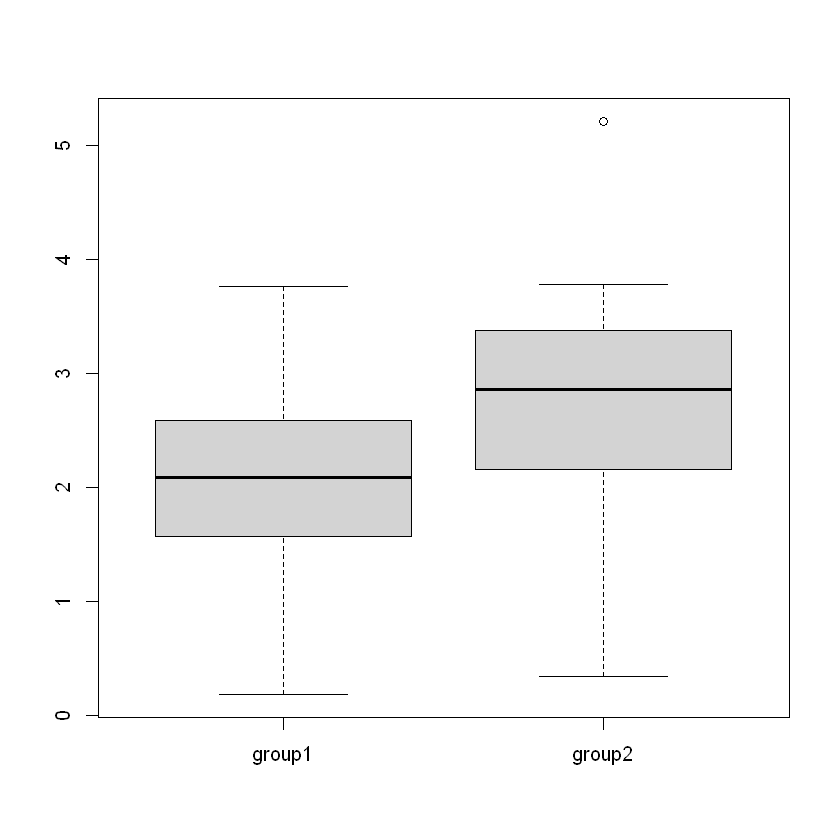

In [3]:
group1 = rnorm(20, mean=2, sd = 1)
group2 = rnorm(20, mean=3, sd = 1)
boxplot(cbind(group1,group2))
t.test(group1, group2, alternative="greater")

### two-sided tests

$$
H_0: \mu_1 = \mu_2 \text{ versus } H_1: \mu_1 \ne \mu_2
$$

Test-stat: the same

Rejection region: we reject the null if the test statistic is $t<a$ or $t>b$ where the critical values $a$ and $b$ are the 97.5% and 2.5% quantile of the t distribution with $n_1+n_2-2$ degrees of freedom.

In [4]:
t.test(group1, group2, alternative="two.sided")


	Welch Two Sample t-test

data:  group1 and group2
t = -1.9968, df = 36.366, p-value = 0.05337
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.217361172  0.009254676
sample estimates:
mean of x mean of y 
 2.148254  2.752307 


## F-test for more than two samples
The F-test (ANOVA) can determine whether multiple group means are equal. Let $\mu_1,\dots,\mu_k$ be the means of $k$ populations. 

$$ H_0: \mu_1 = \dots = \mu_k \text{ versus } H_1: \text{at least two means are not equal}$$

Test-stat: $t$ = variation between sample means / variation within the samples

Rejection region: We reject the null if $t>a$ where $a$ is the 95% quantile of the F distribution.

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  23.99  11.993   10.64 0.000118 ***
Residuals   57  64.23   1.127                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

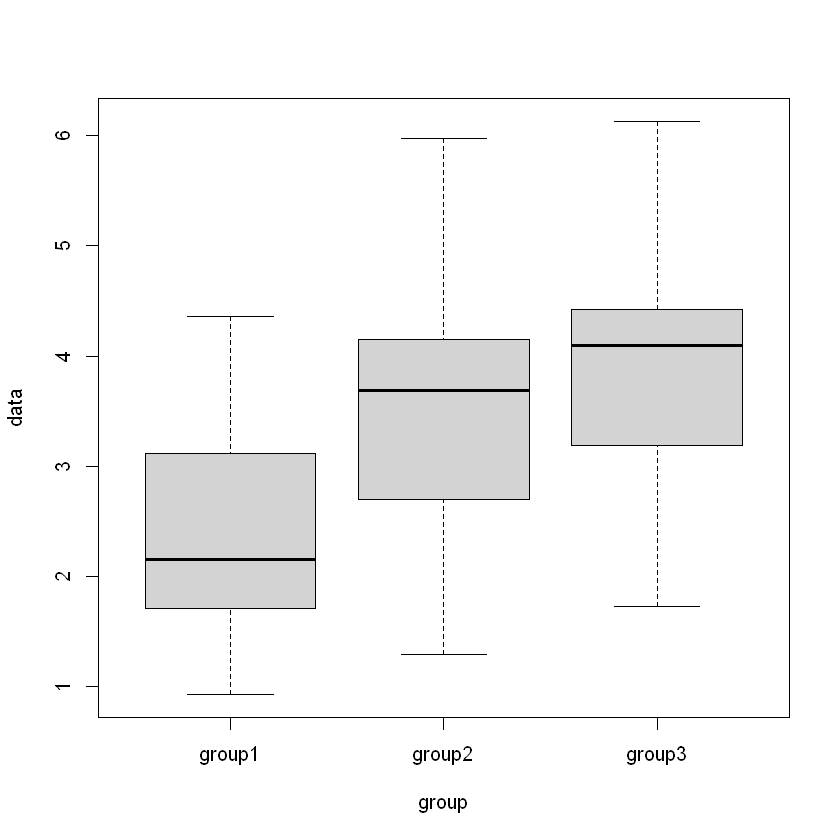

In [5]:
group1 = rnorm(20, mean=2, sd = 1)
group2 = rnorm(20, mean=3.2, sd = 1)
group3 = rnorm(20, mean=4, sd = 1)
data = c(group1,group2,group3)
group= c(rep("group1",20),rep("group2",20),rep("group3",20))
boxplot(data~group)
result = aov(data~group)
summary(result)

## Association test (contingency table):

The association test can determine whether there is association between two variables, for instance, smoking and gender. We randomly take 20 people (12 female and 8 male) and count the number of people who smoke. We want to know if smoking is associated with gender.

$$
\begin{array}{|l|l|l|l|}
\hline & smoking & non-smoking & total \\
\hline male & 6(3.6) & 2(4.4) & 8 \\
\hline female & 3(5.4) & 9(6.6) & 12 \\
\hline total & 9 & 11 & 20 \\
\hline
\end{array}
$$

$H_0$ : gender and smoking are independent versus $H_1$ : not independent

If the null hypothesis is true, then $P(M\cap S))=P(M)) * P(S)=8 / 20 * 9 / 20$. Thus, under the null hypothesis, the expected number of male who smoke is $8 / 20 * 9 / 20 * 20=3.6$. Similarly, the expected number of female who smoke is $12 / 20 * 9 / 20 * 20=5.4$. The expected number of male who do not smoke is $8 / 20 * 11 / 20 * 20=4.4$. The expected number of female who do not smoke is $12 / 20 * 11 / 20 * 20=6.6$.

Test-stat: $t=\sum_{i=1}^{4} \frac{\left(o_{i}-e_{i}\right)^{2}}{e_{i}}$. 

The null distribution of the test statistic is asymptotically (sample size is large) the chi-square distribution with $(r-1)(c-1)$ degrees of freedom, in which $r$ is the number of rows and $c$ is the number of columns.

Rejection region: we reject the null if $t>a$, where $a$ is the 95% quantile of the chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

In [6]:
x=matrix(c(6,3,2,9),2,2)
contingency_table = as.table(x)
result = chisq.test(contingency_table)
result
print(paste("the expected count is ",result$expected))

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 3.0387, df = 1, p-value = 0.0813


[1] "the expected count is  3.6" "the expected count is  5.4"
[3] "the expected count is  4.4" "the expected count is  6.6"


## Likelihood ratio test

### 1. Two points hypothesis

$\mathrm{H}_{0}: \theta=\theta_{0}$ vs $\mathrm{H}_{1}: \theta=\theta_{1}$ 

Test-stat: $t=\frac{l_{0}}{l_{1}}$, or equivalently, $t=2 \log \left(l_{1}\right)-2 \log \left(l_{0}\right)$, where $l_{0}$ is the likelihood under the null hypothesis and $l_{1}$ is the likelihood under the alternative hypothesis.

Rejection region: we reject the null if $t>a$, where $a$ is the 95% quantile of the null distribution of the test statistic.


````\{prf:example\} 6.2
:nonumber:
:label: 6.2
:nonumber:
Given a random sample $X_{1}, X_{2}, \ldots, X_{n} \sim \operatorname{Normal}\left(\mu, \sigma^{2}=1\right)$, we want to test if $\mu=1$ or $\mu=2$.

$$\mathrm{H}_{0}: u=1 \text { vs } \mathrm{H}_{1}: u=2 \\$$

We first find the likelihood score $l_0$ for the null hypothesis

$$
\begin{gathered}
l_{0}=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}}=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi}} e^{-\frac{\left(x_{i}-1\right)^{2}}{2}}
\end{gathered}
$$

and the likelihood score $l_1$ for the alternative hypothesis

$$
l_{1}=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi}} e^{-\frac{\left(x_{i}-2\right)^{2}}{2}}
$$

The test statistic is given by

$$
t=2 \log \left(l_{1}\right)-2 \log \left(l_{0}\right)=\frac{-2 \sum_{i=1}^{n} x_{i}+3 n}{2}=-\sum_{i=1}^{n} x_{i}+\frac{3 n}{2}
$$

The null distribution of $t$ is normal with mean $-n \mu+\frac{3 n}{2}$ and variance $n \sigma^{2}$.

Rejection region: we reject the null if $t>a$, where $a$ is the 95% quantile of the null distribution of the test statistic $t$.
````

In [7]:
x = rnorm(20,mean=2,sd=1)
loglike0 = sum(log(dnorm(x,mean=2,sd=1)))
loglike1 = sum(log(dnorm(x,mean=3,sd=1)))
t = 2*loglike1 - 2*loglike0
a = qchisq(0.95,df=1)
print(paste("the test statistic is",t, "and the critical value a =",a))

[1] "the test statistic is -19.8215542842016 and the critical value a = 3.84145882069412"


````{prf:lemma} Neyman-Pearson lemma
The likelihood ratio test for two simple hypotheses is the most powerful test.
````

### 2. The hypotheses are intervals

$\mathrm{H}_{0}: \theta \in \Theta_{0}$ vs $\mathrm{H}_{1}: \theta \in \Theta_{1}$ 

Test-stat: $t=2 \log \left(l_{1}\right)-2 \log \left(l_{0}\right)$, where $l_{0}=\max _{\theta \in \Theta_{0}}\{l(\theta)\}$ is the maximum likelihood score under the null hypothesis and $l_{1}$ is the maximum likelihood score $l_{1}=$ $\max _{\theta \in \Theta_{1}}\{l(\theta)\}$ under the alternative hypothesis.

Rejection region: we reject the null if $t>a$ where $a$ is the 95% quantile of the null distribution of the test statistic.

### 3. Nested hypotheses (the null hypothesis is nested in the alternative hypothesis)

$\mathrm{H}_{0}: \mathrm{M}_{0}$ vs $\mathrm{H}_{1}: \mathrm{M}_{1}$

Test-stat: $t=2 \log \left(l_{1}\right)-2 \log \left(l_{0}\right)$, where $l_{0}=\max _{\theta \in \mathrm{M}_{0}}\{l(\theta)\}$ is the maximum likelihood score under the null hypothesis and $l_{1}$ is the maximum likelihood score $l_{1}=$ $\max _{\theta \in \mathrm{M}_{1}}\{l(\theta)\}$ under the alternative hypothesis. 

The null distribution of the test statistic is asymptotically the chi-square distribution with $\mathrm{df}=\left(\right.$ number of free parameters in $\mathrm{H}_{1}-$ number of free parameters in $\left.\mathrm{H}_{0}\right)$

Rejection region: we reject the null if $t>a$ where $a$ is the 95% quantile of the chi-square distribution

In [8]:
x = rnorm(20,mean=2,sd=1)
loglike0 = sum(log(dnorm(x,mean=1.2,sd=1)))
loglike1 = sum(log(dnorm(x,mean=mean(x),sd=1)))
t = 2*loglike1 - 2*loglike0
a = qchisq(0.95,df=1)
print(paste("the test statistic is",t, "and the critical value a =",a))

[1] "the test statistic is 31.2677726478089 and the critical value a = 3.84145882069412"


## Mann-Whitney test (nonparametric test for two samples)

The data consist of two random samples. Let $X_{1}, \dots, X_{n}$ be the sample generated from population 1 and $Y_{1}, \dots, Y_{m}$ be the sample from population 2. We want to test if two samples are from the same population, i.e.,

$$
\mathrm{H}_{0}: pop1 = pop2 \text{  versus } \mathrm{H}_{1}: \text{pop1 not equal pop2}
$$

Test-stat: Ranking all observations from the minimum to the maximum. If several sample values are exactly equal to each other (tied), assign to each the average rank. Let $\mathrm{R}\left(\mathrm{X}_{\mathrm{i}}\right)$ denote the ranks of $\mathrm{X}_{\mathrm{i}}$. The test statistic is $T=\sum_{i=1}^{n} R\left(X_{i}\right)$.

Under the null hypothesis that two samples are generated from the same population, the ranks of $X$ and $Y$ are totally random. Thus, the ranks of $X$ (assuming no ties) are $n$ numbers chosen at random without replacement from $(1,2, \ldots, n+m)$. The null distribution of $\mathrm{T}$ can be derived for small $\mathrm{n}$ and $\mathrm{m}$ (table). For large $\mathrm{n}$ and $\mathrm{m}$, we can use simulation to calculate the null distribution of $T$.

Rejection region: we reject the null hypothesis if $t>a$ or $t<b$, where $a$ is the 97.5% quantile of the null distribution of the test statistic, and $b$ is the 2.5% quantile of the null distribution of the test statistic.

````\{prf:example\} 6.3
:nonumber:
:label: 6.3
:nonumber:

Data is given in the table

$$
\begin{array}{|l|l|l|l|l|l|}
\hline X & 2.3(5) & 1.4(1) & 1.6(3) & 1.8(4) & \\
\hline Y & 1.5(2) & 3.7(9) & 3.2(7) & 2.8(6) & 3.3(8) \\
\hline
\end{array}
$$

Test-stat: Let $R_i$ be the sum of the ranks in group $i$. Define $U_i=n_1n_2+\frac{n_i(n_i+1)}{2}-R_i$. The test statistic is the smaller of $U_1$ and $U_2$. 

Rejection region: we reject the null hypothesis if $t>a$ or $t<b$, where $a$ is the 97.5% quantile of the null distribution of the test statistic, and $b$ is the 2.5% quantile of the null distribution of the test statistic.

````

In [9]:
x=c(2.3,1.4,1.6,1.8)
y=c(1.5,3.7,3.2,2.8,3.3)
wilcox.test(x,y)


	Wilcoxon rank sum exact test

data:  x and y
W = 3, p-value = 0.1111
alternative hypothesis: true location shift is not equal to 0
